In [ ]:
from google.colab import drive
drive.mount('/gdrive')

import os
colab_path = "/gdrive/My Drive/Colab Notebooks"

Mounted at /gdrive


# 새 섹션

In [ ]:
#설치

!pip install konlpy
#한글 설치
! apt-get update -qq
! apt-get install fonts-nanum* -qq
#wordcloud 설치
! pip install konlpy wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 465 kB 38.9 MB/s 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123991 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (201

In [ ]:
#폰트 적용 확인 1
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

{f for f in sys_font if 'Nanum' in f}

#폰트 적용 확인 2
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

path ='/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font',family=font_name)
fm._rebuild()

NanumGothic Eco


In [ ]:
#대화내용 csv불러오기
import pandas as pd
import re
import datetime as dt
import io

def read_msg(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        msg_list = f.readlines()

    return msg_list

df = pd.read_csv("/gdrive/My Drive/Colab Notebooks/teamateData.csv")

df['dattime'] = df['datetime'].str.replace("+","")
df['dattime'] = df['dattime'].str.replace("00:00","",457)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  from ipykernel import kernelapp as app


,datetime,groupid,telid,context,dattime
0,2022-04-28 07:27:01+00:00,-613454002,1750342024,세영아 난 여기까진가봐🥲,2022-04-28 07:27:01
1,2022-04-28 07:27:08+00:00,-613454002,1739915236,안녕🥕,2022-04-28 07:27:08
2,2022-04-28 07:38:06+00:00,-613454002,1739915236,안녕🥕,2022-04-28 07:38:06
3,2022-04-28 07:38:13+00:00,-613454002,1750342024,hi,2022-04-28 07:38:13
4,2022-04-28 07:38:31+00:00,-613454002,1739915236,안녕🥕,2022-04-28 07:38:31
...,...,...,...,...,...
1987,2022-06-17 19:04:04,-691861746,5281167028,50 생각해보니까 신뢰할 수가 없어,2022-06-17 19:04:04
1988,2022-06-17 19:04:11,-691861746,5195128767,아,2022-06-17 19:04:11
1989,2022-06-17 19:04:12,-691861746,5281167028,80로 올리는 거 어때,2022-06-17 19:04:12
1990,2022-06-17 19:04:15,-691861746,5195128767,제출했는데,2022-06-17 19:04:15


In [ ]:
#context를 nouns로 형태소 분석
from konlpy.tag import Okt

#형태소 분석기 정의
okt = Okt()
nouns = []

for i in range(len(df)):
    no = okt.nouns(str(df['context'][i]))
    nouns.append(no)

# 파생변수 추가
df['nouns'] = nouns

df

,datetime,groupid,telid,context,dattime,nouns
0,2022-04-28 07:27:01+00:00,-613454002,1750342024,세영아 난 여기까진가봐🥲,2022-04-28 07:27:01,"[세영, 난, 여기]"
1,2022-04-28 07:27:08+00:00,-613454002,1739915236,안녕🥕,2022-04-28 07:27:08,[안녕]
2,2022-04-28 07:38:06+00:00,-613454002,1739915236,안녕🥕,2022-04-28 07:38:06,[안녕]
3,2022-04-28 07:38:13+00:00,-613454002,1750342024,hi,2022-04-28 07:38:13,[]
4,2022-04-28 07:38:31+00:00,-613454002,1739915236,안녕🥕,2022-04-28 07:38:31,[안녕]
...,...,...,...,...,...,...
1987,2022-06-17 19:04:04,-691861746,5281167028,50 생각해보니까 신뢰할 수가 없어,2022-06-17 19:04:04,"[생각, 신뢰, 수가]"
1988,2022-06-17 19:04:11,-691861746,5195128767,아,2022-06-17 19:04:11,[]
1989,2022-06-17 19:04:12,-691861746,5281167028,80로 올리는 거 어때,2022-06-17 19:04:12,"[로, 거]"
1990,2022-06-17 19:04:15,-691861746,5195128767,제출했는데,2022-06-17 19:04:15,[제출]


In [ ]:
#한개의 groupid 만 출력하기
import nltk
from konlpy.corpus import kobill

files_ko = kobill.fileids()

ndf = df.loc[:,['dattime','groupid','telid','nouns']]
    #chat.csv 생성

    #groupid 출력
wi_df = ndf[ndf['groupid'] == -681664408]
wi_df.to_csv("/gdrive/My Drive/Colab Notebooks/data3.csv", index=False)

wi_df

,dattime,groupid,telid,nouns
61,2022-05-02 04:58:07,-681664408,5119999384,[]
62,2022-05-02 04:58:16,-681664408,5119999384,"[애, 우리, 점수]"
63,2022-05-02 04:59:55,-681664408,5271007996,"[출석, 한밭대, 앱, 마치]"
64,2022-05-02 05:03:04,-681664408,5119999384,[마장]
67,2022-05-02 06:15:39,-681664408,5119999384,[하이루]
...,...,...,...,...
937,2022-05-09 15:31:57,-681664408,5146507514,[주제가]
938,2022-05-09 15:31:59,-681664408,5146507514,"[편의, 시설]"
940,2022-05-09 15:32:36,-681664408,5146507514,"[카페, 기, 휴게실]"
943,2022-05-09 15:33:17,-681664408,1407731596,[시설]


groupid 의 wordcloud 출력

<Figure size 432x288 with 0 Axes>

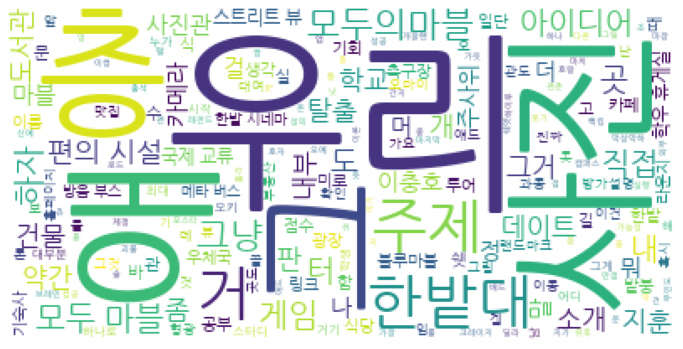

In [ ]:
#group id에 대한 wordcloud 생성
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import matplotlib as mpl
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

data = pd.read_csv("/gdrive/My Drive/Colab Notebooks/data3.csv")

path= '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

data_list = data['nouns'].tolist()
data_text = "".join(data_list)
data_text = re.sub("'","", data_text)

wordcloud = WordCloud(background_color = "white", font_path=path).generate(data_text)

fig = plt.figure(1)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
#index 0부터 다시 설정
wi_df = wi_df.reset_index(drop=True)
wi_df

#str 문제 해결
wi_df['dattime'] = pd.to_datetime(wi_df.dattime, format='%Y-%m-%d %H:%M:%S')
wi_df

,dattime,groupid,telid,nouns
0,2022-05-02 04:58:07,-681664408,5119999384,[]
1,2022-05-02 04:58:16,-681664408,5119999384,"[애, 우리, 점수]"
2,2022-05-02 04:59:55,-681664408,5271007996,"[출석, 한밭대, 앱, 마치]"
3,2022-05-02 05:03:04,-681664408,5119999384,[마장]
4,2022-05-02 06:15:39,-681664408,5119999384,[하이루]
...,...,...,...,...
463,2022-05-09 15:31:57,-681664408,5146507514,[주제가]
464,2022-05-09 15:31:59,-681664408,5146507514,"[편의, 시설]"
465,2022-05-09 15:32:36,-681664408,5146507514,"[카페, 기, 휴게실]"
466,2022-05-09 15:33:17,-681664408,1407731596,[시설]


In [ ]:
#시간 차이 계산하기
from datetime import datetime, timedelta

mk_df3 = datetime(2022, 7, 22, 1,30,00)
dff_mk = abs(mk_df3 - mk_df3)
wi_df['diff'] = dff_mk

for i in range(1, len(wi_df['dattime'])):
    wi_df['diff'][i] = abs(wi_df['dattime'][i-1]-wi_df['dattime'][i])
wi_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,dattime,groupid,telid,nouns,diff
0,2022-05-02 04:58:07,-681664408,5119999384,[],0 days 00:00:00
1,2022-05-02 04:58:16,-681664408,5119999384,"[애, 우리, 점수]",0 days 00:00:09
2,2022-05-02 04:59:55,-681664408,5271007996,"[출석, 한밭대, 앱, 마치]",0 days 00:01:39
3,2022-05-02 05:03:04,-681664408,5119999384,[마장],0 days 00:03:09
4,2022-05-02 06:15:39,-681664408,5119999384,[하이루],0 days 01:12:35
...,...,...,...,...,...
463,2022-05-09 15:31:57,-681664408,5146507514,[주제가],0 days 00:00:01
464,2022-05-09 15:31:59,-681664408,5146507514,"[편의, 시설]",0 days 00:00:02
465,2022-05-09 15:32:36,-681664408,5146507514,"[카페, 기, 휴게실]",0 days 00:00:37
466,2022-05-09 15:33:17,-681664408,1407731596,[시설],0 days 00:00:41


In [ ]:
#30분 이상 차이 확인하기
from datetime import datetime, timedelta

#30분 간격 dff_mk 생성
mk_df1 = datetime(2022, 7, 22, 1,30,00)
mk_df2 = datetime(2022, 7, 22, 1,00,00)
dff_mk = abs(mk_df1 - mk_df2)

j=0
wi_df['diff_group'] = j

#30분 말 안했을 때 기준으로 그룹 순서 정해주기
for i in range(0, len(wi_df['dattime'])):
    if wi_df.loc[:,('diff')][i] <= dff_mk:
        wi_df['diff_group'][i] = j
    elif wi_df.loc[:,('diff')][i] > dff_mk:
        j= j+1
        wi_df['diff_group'][i] = j

wi_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,dattime,groupid,telid,nouns,diff,diff_group
0,2022-05-02 04:58:07,-681664408,5119999384,[],0 days 00:00:00,0
1,2022-05-02 04:58:16,-681664408,5119999384,"[애, 우리, 점수]",0 days 00:00:09,0
2,2022-05-02 04:59:55,-681664408,5271007996,"[출석, 한밭대, 앱, 마치]",0 days 00:01:39,0
3,2022-05-02 05:03:04,-681664408,5119999384,[마장],0 days 00:03:09,0
4,2022-05-02 06:15:39,-681664408,5119999384,[하이루],0 days 01:12:35,1
...,...,...,...,...,...,...
463,2022-05-09 15:31:57,-681664408,5146507514,[주제가],0 days 00:00:01,2
464,2022-05-09 15:31:59,-681664408,5146507514,"[편의, 시설]",0 days 00:00:02,2
465,2022-05-09 15:32:36,-681664408,5146507514,"[카페, 기, 휴게실]",0 days 00:00:37,2
466,2022-05-09 15:33:17,-681664408,1407731596,[시설],0 days 00:00:41,2


In [ ]:
#동일한가 bool 로 표현하기
wi_df['bool'] = False
wi_df['bool']=(wi_df.duplicated(subset=['telid','diff_group']))

wi_df

,dattime,groupid,telid,nouns,diff,diff_group,bool
0,2022-05-02 04:58:07,-681664408,5119999384,[],0 days 00:00:00,0,False
1,2022-05-02 04:58:16,-681664408,5119999384,"[애, 우리, 점수]",0 days 00:00:09,0,True
2,2022-05-02 04:59:55,-681664408,5271007996,"[출석, 한밭대, 앱, 마치]",0 days 00:01:39,0,False
3,2022-05-02 05:03:04,-681664408,5119999384,[마장],0 days 00:03:09,0,True
4,2022-05-02 06:15:39,-681664408,5119999384,[하이루],0 days 01:12:35,1,False
...,...,...,...,...,...,...,...
463,2022-05-09 15:31:57,-681664408,5146507514,[주제가],0 days 00:00:01,2,True
464,2022-05-09 15:31:59,-681664408,5146507514,"[편의, 시설]",0 days 00:00:02,2,True
465,2022-05-09 15:32:36,-681664408,5146507514,"[카페, 기, 휴게실]",0 days 00:00:37,2,True
466,2022-05-09 15:33:17,-681664408,1407731596,[시설],0 days 00:00:41,2,True


In [ ]:
#telid의 group 2만 출력하기
m_df = wi_df[(wi_df['telid']== 5119999384) & (wi_df['diff_group']==2)]
m_df.to_csv("/gdrive/My Drive/Colab Notebooks/test.csv", index=False)
m_df


,dattime,groupid,telid,nouns,diff,diff_group,bool
248,2022-05-09 14:12:48,-681664408,5119999384,[애],7 days 07:35:58,2,False
249,2022-05-09 14:12:49,-681664408,5119999384,[애],0 days 00:00:01,2,True
250,2022-05-09 14:12:57,-681664408,5119999384,"[도, 사진, 사용]",0 days 00:00:08,2,True
251,2022-05-09 14:13:00,-681664408,5119999384,[],0 days 00:00:03,2,True
256,2022-05-09 14:14:52,-681664408,5119999384,[애],0 days 00:00:56,2,True
...,...,...,...,...,...,...,...
419,2022-05-09 15:14:53,-681664408,5119999384,[애],0 days 00:03:24,2,True
420,2022-05-09 15:15:08,-681664408,5119999384,"[스트리트, 뷰, 도, 사진]",0 days 00:00:15,2,True
421,2022-05-09 15:15:11,-681664408,5119999384,[수],0 days 00:00:03,2,True
426,2022-05-09 15:22:05,-681664408,5119999384,"[애, 그, 건물]",0 days 00:04:19,2,True


In [ ]:
#telid 1개와 group1의 텍스트 읽어오기
f = open("/gdrive/My Drive/Colab Notebooks/test.csv",'r',encoding='utf-8')
lines = f.readlines()
line = []
for i in range(len(lines)):
    line.append(lines[i])

f.close()

#명사만 추출
result =[]
result = [okt.nouns(i) for i in line]

#리스트 생성
final_result= [r for i in result for r in i]
print(final_result)

#명사 빈도수 확인
count = pd.Series(final_result).value_counts()
print(count)

['애', '애', '도', '사진', '사용', '애', '주제', '했느넫', '사진', '도니', '데', '도', '사진', '못', '사진기', '줃데', '너', '지훈', '바', '내', '피피티', '터', '스트리트', '뷰', '형광', '그', '곳', '여기', '옆', '곳', '거', '내', '애', '우리', '약간', '주제', '정', '거', '대답', '좀', '의견', '말', '시간', '우리', '그', '기숙사', '앞', '곳도', '그', '축구장', '축구장', '앞', '의자', '곳', '거', '아이디어', '생각', '내부', '애', '뭐', '터', '더', '아이디어', '한밭대', '편의', '시설', '맛집', '투어', '누가', '편의', '시설', '그냥', '도', '카메라', '사진', '양', '나중', '애', '편의', '시설', '말', '국제', '교류', '관', '뭐잏는데', '애', '편의', '시설', '학생', '방음', '부스', '한밭', '시네마', '사진관', '모름', '나', '더', '우리', '고생', '해도', '오늘', '기획서', '발표', '애', '주차', '강의', '자료', '바', '링크', '애', '패들랫', '누가', '화면', '구성', '해주', '삼', '그거', '제목', '지훈', '초대', '함', '잉', '애', '스트리트', '뷰', '도', '사진', '수', '애', '그', '건물', '건물', '입구']
애      11
사진      5
도       4
그       4
편의      4
       ..
투어      1
그냥      1
카메라     1
양       1
입구      1
Length: 87, dtype: int64


In [ ]:
## google docs 을 txt파일로 저장
# 최종 산출물 빈도수 측정(키워드 20위까지)

#text 불러오기
from collections import Counter

f = open("/gdrive/My Drive/Colab Notebooks/12.txt",'r',encoding='utf-8')
lines = f.readlines()
line = []
for i in range(len(lines)):
    line.append(lines[i])
f.close()

#최종 산출물 명사만 출력하여 리스트 생성
result_nouns =[]
result_nouns = [okt.nouns(i) for i in line]
final_nouns= [r for i in result_nouns for r in i]

#불용어 제거
x = input()
stop_words = x+"현재, 관련, 저, 이번, 이, 가, 께서, 에서, 이, 의, 을, 를, 에, 에게, 께, 한테, 에게서, 보다, 로, 고, 라고, 와, 과, 랑, 은, 는, 부터, 로부터, 으로부터, 나, 란, 에, 처럼, 만큼, 아, 야, 이다, 이며, 에다, 조차, 그래, 따라, 즉, 든지"
#"현재, 관련, 저, 이번, 이, 가, 께서, 에서, 이, 의, 을, 를, 에, 에게, 께, 한테, 에게서, 보다, 로, 고, 라고, 와, 과, 랑, 은, 는, 부터, 로부터, 으로부터, 나, 란, 에, 처럼, 만큼, 아, 야, 이다, 이며, 에다, 조차, 그래, 따라, 즉, 든지"
result = []
stop_list = stop_words.split(', ')

for i in final_nouns:
    if i not in stop_list:
        result.append(i)
print(result)

#20위까지 추출하여 딕셔너리 생성{명사 : 수}
#####final_nouns 말고 result들어가야함
counts = Counter(result)
count = counts.most_common(10)
count_1 = dict(count)

#딕셔너리에서 key값만 불러오기
key_list = []
for key in count_1:
    key_list.append(key)
print(key_list)

# 중복값 리스트 추출(겹치는 것 있음)
final_list = []
for i in final_result:
    if i in key_list:
        final_list.append(i)
print(final_list)

# 중복값 리스트에서 몇번 나왔는지 확인
count2 = pd.Series(final_list).value_counts()
print(count2)


dk
['공학', '설계', '입문', '프로젝트', '최종', '결과', '보고서', '제목', '비대', '원격', '수업', '질', '방안', '비대', '멘토링', '어플', '활용', '학생', '실력', '향상', '멘토링', '활동', '통한', '학생', '질문', '해결', '프로젝트', '팀', '원', '학번', '이름', '신예', '솔', '프로젝트', '팀', '원', '학번', '이름', '최로운', '프로젝트', '팀', '원', '학번', '이름', '한지훈', '프로젝트', '팀', '원', '학번', '이름', '이충호', '목차', '서론', '연구', '동기', '코로나', '비대', '수업', '전체', '활성화', '점차', '대부분', '대학', '자체', '녀', '수업', '시스템', '구축', '비대', '수업', '활용', '한밭대', '학교', '본교', '작년', '비', '대면', '통', '학교', '수업', '실행', '지난', '원격', '수업', '학생', '비대', '수업', '한계', '의견', '교수', '상이', '원격', '강의', '시스템', '속', '일부', '학생', '질', '강의', '계속', '불만', '토로', '한밭대', '학교', '본교', '작년', '비', '대면', '통', '학교', '수업', '실행', '년도', '전체', '대면', '수업', '학생', '직접', '수업', '참여', '기회', '교수', '사정', '학생', '사정', '부득이', '수업', '참여', '경우', '한밭대', '학교', '자체', '운영', '한밭대', '이러닝', '캠퍼스', '홈페이지', '플랫폼', '통해', '비대', '수업', '진행', '이후', '출석', '인증', '서류', '제출', '출석', '영향', '시스템', '구축', '비대', '수업', '활용', '대면', '수업', '대신', '강의', '영상', '이러닝', '캠퍼스', '게시', '수업', '

final report의 wordcloud 출력

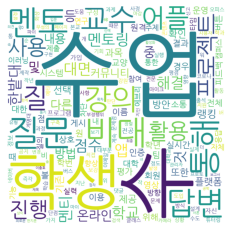

In [ ]:
#딕셔너리 생성
counts_1 = Counter(result)
count_1 = counts_1.most_common()
count_2 = dict(count_1)

wordcloud = WordCloud(background_color = "white", width = 800, height = 800, font_path=path).generate_from_frequencies(count_2)

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

중복리스트의 wordcloud 출력

{'학생': 1, '강의': 1, '수': 1}


<Figure size 432x288 with 0 Axes>

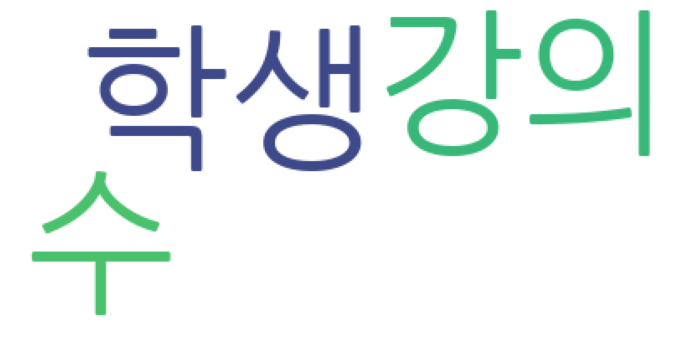

In [ ]:
#중복리스트에  wordcloud 생성
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import matplotlib as mpl
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

path= '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

count = Counter(final_list)
words = dict(count.most_common())
print(words)

wordcloud = WordCloud(background_color = "white", font_path=path).generate_from_frequencies(words)

fig = plt.figure(1)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
#점수 측정하기
score_list = []
score = 0
for i in final_list:
    if i in score_list:
        score += 0.5
    else:
        score_list.append(i)
        score += 1
print('score :', score)

#telid 와 score을 scv로 추출 -> xlsx로 변환
import pandas as pd

cf = pd.DataFrame({'time_group': '2', 'telid' : 'User4', 'score': [score]})
cf.to_csv('data_score.csv', index=False, encoding='cp949')

cf = pd.read_csv("data_score.csv")
xlsx = pd.ExcelWriter("data_score.xlsx")
cf.to_excel(xlsx, index = False)
xlsx.save()

score : 3


In [ ]:
import pandas as pd

# 원하는 엑셀 파일을 pd.read_excel('') 함수를 이용해 데이터프레임으로 만들어준다.
df1 = pd.read_excel('/gdrive/My Drive/Colab Notebooks/file/data_score[1407731596].xlsx')
df2 = pd.read_excel('/gdrive/My Drive/Colab Notebooks/file/data_score[5119999384].xlsx')
df3 = pd.read_excel('/gdrive/My Drive/Colab Notebooks/file/data_score[5146507514].xlsx')
df4 = pd.read_excel('/gdrive/My Drive/Colab Notebooks/file/data_score[5271007996].xlsx')

# merge 함수를 이용해 합쳐준다. left는 df1 기준으로 df2가 붙는다는 뜻.
merge_df = pd.DataFrame()

# 해당 데이터프레임을 엑셀로 저장해준다.
merge_df = merge_df.append(df4)
merge_df = merge_df.append(df3)
merge_df = merge_df.append(df2)
merge_df = merge_df.append(df1)

merge_df.to_excel("data_score2.xlsx")
xlsx.save()

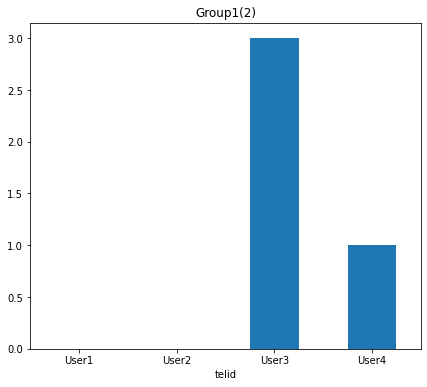

In [ ]:
data = pd.read_excel("data_score2.xlsx")
df = data.set_index('telid')

df['score'].plot(kind = 'bar', title = 'Group1(2)',  figsize=(7,6))
plt.xticks(rotation=360)
plt.show()

#숫자말고 User로 뽑아내기 ,, 위에서 telid의 저장 경로 설정하기